In [1]:
import torch
print(torch.__version__)

1.7.1


A PyTorch Tensor is basically the same as a numpy array: it does not know anything about deep learning or computational graphs or gradients, and is just a generic n-dimensional array to be used for arbitrary numeric computation.

The biggest difference between a numpy array and a PyTorch Tensor is that a PyTorch Tensor can run on either CPU or GPU.

In [2]:
x = torch.Tensor([5,3])
y = torch.Tensor([2,1])

print(x*y)

tensor([10.,  3.])


In [19]:
device = "cuda" if torch.cuda.is_available() else "cpu" #This is the best practice as it runs both on CPU and GPU machines
z = torch.tensor([[1,2,3], [4,5,6]],device =device, dtype = torch.float64,requires_grad = True) #device = "cuda" is part of attribute for running tensors on GPU,requires_grad is set to True if we need gradient computation later on in gradient descent type problems
print(z)
print(z.dtype)
print(z.device)
print(z.shape)
print(z.requires_grad)

tensor([[1., 2., 3.],
        [4., 5., 6.]], dtype=torch.float64, requires_grad=True)
torch.float64
cpu
torch.Size([2, 3])
True


In PyTorch torch.Tensor is the main tensor class. So all tensors are just instances of torch.Tensor.

When you call torch.Tensor() you will get an empty tensor without any data.

In contrast torch.tensor is a function which returns a tensor.

So,torch.Tensor() can be used as a standalone fn. but torch.tensor() needs data in it,else it gives an error

In [3]:
x = torch.zeros([2,5])
print(x)

tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])


In [5]:
print(x.shape)

torch.Size([2, 5])


In [7]:
y = torch.rand([2,5]) #rand is used to randomly initialise an array just like in numpy
print(y)

tensor([[0.6528, 0.1557, 0.4163, 0.4541, 0.8711],
        [0.9251, 0.3352, 0.7357, 0.9102, 0.0534]])


In [9]:
y.view([1,10]) #reshape in numpy as view in pytorch,but inplace is false,so when we print y in the next cell,the value is the same

tensor([[0.6528, 0.1557, 0.4163, 0.4541, 0.8711, 0.9251, 0.3352, 0.7357, 0.9102,
         0.0534]])

In [10]:
print(y)

tensor([[0.6528, 0.1557, 0.4163, 0.4541, 0.8711],
        [0.9251, 0.3352, 0.7357, 0.9102, 0.0534]])


In [11]:
y = y.view([1,10])

In [12]:
print(y)

tensor([[0.6528, 0.1557, 0.4163, 0.4541, 0.8711, 0.9251, 0.3352, 0.7357, 0.9102,
         0.0534]])


In [20]:
# Other common initialization methods,these are usually used for initialisations when we write a class's __init__ method.
x = torch.empty(size=(3, 3))  # Tensor of shape 3x3 with uninitialized data
print(x)
x = torch.zeros((3, 3))  # Tensor of shape 3x3 with values of 0
print(x)
x = torch.rand((3, 3))  # Tensor of shape 3x3 with values from uniform distribution in interval [0,1)
print(x)
x = torch.ones((3, 3))  # Tensor of shape 3x3 with values of 1
print(x)
x = torch.eye(5, 5)  # Returns Identity Matrix I, (I <-> Eye), matrix of shape 2x3
print(x)
x = torch.arange(start=0, end=5, step=1)  # Tensor [0, 1, 2, 3, 4], note, can also do: torch.arange(11)
print(x)
x = torch.linspace(start=0.1, end=1, steps=10)  # x = [0.1, 0.2, ..., 1]
print(x)
x = torch.empty(size=(1, 5)).normal_(mean=0, std=1)  # Normally distributed with mean=0, std=1
print(x)
x = torch.empty(size=(1, 5)).uniform_(0, 1)  # Values from a uniform distribution low=0, high=1
print(x)
x = torch.diag(torch.ones(3))  # Diagonal matrix of shape 3x3
print(x)

tensor([[0.0000e+00, 0.0000e+00, 2.2599e-37],
        [0.0000e+00, 1.5695e-43, 0.0000e+00],
        [6.7262e-44, 0.0000e+00, 2.2615e-37]])
tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])
tensor([[0.3749, 0.7887, 0.7627],
        [0.0587, 0.0465, 0.5615],
        [0.1756, 0.7525, 0.1821]])
tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])
tensor([[1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 1.]])
tensor([0, 1, 2, 3, 4])
tensor([0.1000, 0.2000, 0.3000, 0.4000, 0.5000, 0.6000, 0.7000, 0.8000, 0.9000,
        1.0000])
tensor([[-0.5634, -0.1857,  2.6034, -0.6528,  0.3820]])
tensor([[0.8093, 0.7155, 0.8856, 0.9557, 0.3918]])
tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])


In [21]:
# How to make initialized tensors to other types (int, float, double)
# These will work even if you're on CPU or CUDA!
tensor = torch.arange(4)  # [0, 1, 2, 3] Initialized as int64 by default
print(f"Converted Boolean: {tensor.bool()}")  # Converted to Boolean: 1 if nonzero
print(f"Converted int16 {tensor.short()}")  # Converted to int16
print(f"Converted int64 {tensor.long()}")  # Converted to int64 (This one is very important, used super often)
print(f"Converted float16 {tensor.half()}")  # Converted to float16
print(f"Converted float32 {tensor.float()}")  # Converted to float32 (This one is very important, used super often)
print(f"Converted float64 {tensor.double()}")  # Converted to float64


Converted Boolean: tensor([False,  True,  True,  True])
Converted int16 tensor([0, 1, 2, 3], dtype=torch.int16)
Converted int64 tensor([0, 1, 2, 3])
Converted float16 tensor([0., 1., 2., 3.], dtype=torch.float16)
Converted float32 tensor([0., 1., 2., 3.])
Converted float64 tensor([0., 1., 2., 3.], dtype=torch.float64)


In [22]:
# Array to Tensor conversion and vice-versa
import numpy as np

np_array = np.zeros((5, 5))
tensor = torch.from_numpy(np_array)
np_array_again = (tensor.numpy())  # np_array_again will be same as np_array (perhaps with numerical round offs)

Tensor Math & Comparison Operations

In [3]:
x = torch.tensor([1, 2, 3])
y = torch.tensor([9, 8, 7])
print("x",x)
print("y",y)


x tensor([1, 2, 3])
y tensor([9, 8, 7])


In [24]:
# -- Addition --
z1 = torch.empty(3)
print("z1",z1)
torch.add(x, y, out=z1)  # This is one way
print("z1",z1)
z2 = torch.add(x, y)  # This is another way
print("z2",z2)
z = x + y  # This is my preferred way, simple and clean.

z1 tensor([-4.4614e-15,  4.5787e-41,  2.1928e-37])
z1 tensor([10., 10., 10.])
z2 tensor([10, 10, 10])


Initially z1 was empty so it initialised by using some garbage values   
.add() function takes both adding inputs and also an output here z1,so we got tensor as (10 10 10) i.e(1+9 2+8 3+7)     
Other methods are just doing it the pythonic way

In [26]:
# -- Subtraction --
z = x - y  # We can do similarly as the preferred way of addition
print(z)

tensor([-8, -6, -4])


In [4]:
# -- Division (A bit clunky) --
z = x/y
print(z)
z = torch.true_divide(x, y)  # Will do element wise division if of equal shape
print("z by true_divide:",z)
#Note that true_divide() will work only in torch version 1.7 or above,I upgraded my library from 1.3 to 1.7 to run it

tensor([0.1111, 0.2500, 0.4286])
z by true_divide: tensor([0.1111, 0.2500, 0.4286])


In [33]:
# -- Inplace Operations --
t = torch.zeros(3)

t.add_(x)  # Whenever we have operation followed by _ it will mutate the tensor inplace(similar to inplace = True in pandas)
t += x  # Also inplace: t = t + x is not inplace, bit confusing.


In [34]:
print(t) #Here we did inplace using add_() fn as well as we added inplace the pythonic way so t = 2x

tensor([2., 4., 6.])


In [37]:
# -- Exponentiation (Element wise if vector or matrices) --
z = x.pow(2)  # z = [1, 4, 9]
z = x ** 2  # z = [1, 4, 9]

print(z)

tensor([1, 4, 9])


In [39]:
# -- Simple Comparison --
z = x > 0  # Returns [True, True, True]
print(z)
z = x < 0  # Returns [False, False, False]
print(z)


tensor([True, True, True])
tensor([False, False, False])


In [40]:
# -- Matrix Multiplication --
x1 = torch.rand((2, 5))
x2 = torch.rand((5, 3))
x3 = torch.mm(x1, x2)  # Matrix multiplication of x1 and x2, out shape: 2x3
print(x3)
x3 = x1.mm(x2)  # Similar as line above
print(x3)
#Matrix multiplication is done using the fn .mm()

tensor([[1.3463, 1.4367, 1.0308],
        [1.8441, 2.0100, 1.0919]])
tensor([[1.3463, 1.4367, 1.0308],
        [1.8441, 2.0100, 1.0919]])


In [5]:
# -- Matrix Exponentiation -- #Matrix multiplication(matrix cube here) can either be done as matrix*matrix*matrix or matrix_power(3)
matrix_exp = torch.rand(5, 5)
print(matrix_exp.matrix_power(3))  # is same as matrix_exp (mm) matrix_exp (mm) matrix_exp i.e multiplying the matrix with itself thrice here

tensor([[4.9631, 7.4081, 5.7920, 6.7411, 6.0805],
        [4.0699, 6.2339, 4.8884, 5.5674, 5.0909],
        [5.3770, 8.2195, 6.3010, 7.3865, 6.8073],
        [4.1232, 5.9994, 4.5968, 5.5170, 4.9846],
        [3.3668, 5.1938, 3.8890, 4.5114, 4.3595]])


In [6]:
# -- Element wise Multiplication --
z = x * y  # z = [9, 16, 21] = [1*9, 2*8, 3*7]
print(z)

# -- Dot product --
z = torch.dot(x, y)  # Dot product, in this case z = 1*9 + 2*8 + 3*7
print(z)


tensor([ 9, 16, 21])
tensor(46)


In [ ]:
# -- Batch Matrix Multiplication --
batch = 32
n = 10
m = 20
p = 30
tensor1 = torch.rand((batch, n, m))
tensor2 = torch.rand((batch, m, p))
out_bmm = torch.bmm(tensor1, tensor2)  # Will be shape: (b x n x p)



In [ ]:
# -- Example of broadcasting --
x1 = torch.rand((5, 5))
x2 = torch.ones((1, 5))
z = (x1 - x2)  # Shape of z is 5x5: How? The 1x5 vector (x2) is subtracted for each row in the 5x5 (x1)
z = (x1 ** x2)  # Shape of z is 5x5: How? Broadcasting! Element wise exponentiation for every row



In [ ]:
# Other useful tensor operations
sum_x = torch.sum(x, dim=0)  # Sum of x across dim=0 (which is the only dim in our case), sum_x = 6
values, indices = torch.max(x, dim=0)  # Can also do x.max(dim=0)
values, indices = torch.min(x, dim=0)  # Can also do x.min(dim=0)
abs_x = torch.abs(x)  # Returns x where abs function has been applied to every element
z = torch.argmax(x, dim=0)  # Gets index of the maximum value
z = torch.argmin(x, dim=0)  # Gets index of the minimum value
mean_x = torch.mean(x.float(), dim=0)  # mean requires x to be float
z = torch.eq(x, y)  # Element wise comparison, in this case z = [False, False, False]
sorted_y, indices = torch.sort(y, dim=0, descending=False)

z = torch.clamp(x, min=0)
# All values < 0 set to 0 and values > 0 unchanged (this is exactly ReLU function)
# If you want to values over max_val to be clamped, do torch.clamp(x, min=min_val, max=max_val)

x = torch.tensor([1, 0, 1, 1, 1], dtype=torch.bool)  # True/False values
z = torch.any(x)  # will return True, can also do x.any() instead of torch.any(x)
z = torch.all(x)  # will return False (since not all are True), can also do x.all() instead of torch.all()

Lets now analyse how to use a dataset from torchvision

In [13]:
import torchvision #The torchvision package consists of popular datasets, model architectures, and common image transformations for computer vision.
from torchvision import transforms, datasets

In [15]:
train = datasets.MNIST("/home/manju838/coding/env/pytorch_env/Datasets/MNIST", train=True, download=True,transform=transforms.Compose([transforms.ToTensor()]))
test = datasets.MNIST("/home/manju838/coding/env/pytorch_env/Datasets/MNIST", train=False, download=True,transform=transforms.Compose([transforms.ToTensor()]))
# Both train and test datasets are obtained from torchvision.datasets,datasets have MNIST and a few others,so we call that dataset using that particular name
#First parameter is where to store the dataset,I stored it in Datasets/MNIST folder,if train is true then its training data or its for testing,download is set to true,these datasets are not in form of tensors so convert them into tensors.


100.1%Extracting /home/manju838/coding/env/pytorch_env/Datasets/MNIST/MNIST/raw/train-images-idx3-ubyte.gz to /home/manju838/coding/env/pytorch_env/Datasets/MNIST/MNIST/raw
113.5%Extracting /home/manju838/coding/env/pytorch_env/Datasets/MNIST/MNIST/raw/train-labels-idx1-ubyte.gz to /home/manju838/coding/env/pytorch_env/Datasets/MNIST/MNIST/raw
100.4%Extracting /home/manju838/coding/env/pytorch_env/Datasets/MNIST/MNIST/raw/t10k-images-idx3-ubyte.gz to /home/manju838/coding/env/pytorch_env/Datasets/MNIST/MNIST/raw
180.4%Extracting /home/manju838/coding/env/pytorch_env/Datasets/MNIST/MNIST/raw/t10k-labels-idx1-ubyte.gz to /home/manju838/coding/env/pytorch_env/Datasets/MNIST/MNIST/raw
Processing...
Done!


In [18]:
trainset = torch.utils.data.DataLoader(train, batch_size=3, shuffle=True) #Batch size is training data in batches of size,shuffle is for randomising data
testset = torch.utils.data.DataLoader(test, batch_size=10, shuffle=False)

In [19]:
for data in trainset:
    print(data)
    break

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]]]), tensor([4, 0, 3])]


In [21]:
image, label = data[0][0],data[1][0]
print(label)

tensor(4)


These data are from MNIST Dataset,so you get handwritten digits and their corresponding labels between 0-9 inclusive.So for convenience,I iterated three handwritten digit images so I get a tensor of two tensors,the first representing tensor of images and the second representing tensor of corresponding labels.

In [22]:
data[0][0].type()

'torch.FloatTensor'

In [25]:
print(data[0][0].shape)

torch.Size([1, 28, 28])


This is wierd since even grayscale images are (28,28) shape while we get an extra 1

In [26]:
import matplotlib.pyplot as plt 

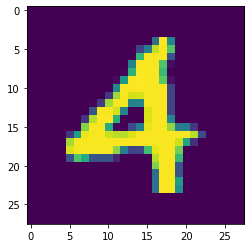

In [27]:
plt.imshow(data[0][0].view(28,28))

Now this matches perfectly with the result of label(0) i.e tensor(4)

In [28]:
total = 0
counter_dict = {0:0, 1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0}


for data in trainset:
    Xs, ys = data
    for y in ys:
        counter_dict[int(y)] += 1
        total += 1

print(counter_dict)

for i in counter_dict:
    print(f"{i}: {counter_dict[i]/total*100.0}%")

{0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}
0: 9.871666666666666%
1: 11.236666666666666%
2: 9.93%
3: 10.218333333333334%
4: 9.736666666666666%
5: 9.035%
6: 9.863333333333333%
7: 10.441666666666666%
8: 9.751666666666667%
9: 9.915000000000001%


We are checking how balanced our dataset is.The max is around 11% while the least is around 9%.So its not perfectly balanced but its okay for ~2% variation